# DAPGEO-02 Well Logs
## All phases
Data cleaning

In [1]:
import lasio , os  
import numpy as np    
import pandas as pd   

import matplotlib as mpl  
import matplotlib.pyplot as plt

%matplotlib inline   

In [2]:
# This function converts null values to NaN
# E.g. null = -9999.25 > Type <print(lasfile.well)> to find out this value
def valtonan(inp, val=-99999.000000):
    """Convert all 'val' to NaN's."""
    inp[inp==val] = np.nan
    return inp

#This function makes for cleaner axis plotting
def remove_last(ax, which='upper'):
    """Remove <which> from x-axis of <ax>.
    which: 'upper', 'lower', 'both'
    """
    nbins = len(ax.get_xticklabels())
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=nbins, prune=which))

#This function smoothes the curves for better visualization
def smooth(data, window_len=10):
    """Smooth the data using a window with requested size."""
    s_p = np.r_[2*data[0]-data[window_len:1:-1],
                data, 2*data[-1]-data[-1:-window_len:-1]]
    w_p = np.ones(window_len, 'd')
    y_p = np.convolve(w_p/w_p.sum(), s_p, mode='same')
    return y_p[window_len-1:-window_len+1]


## Gamma Ray and Radioactive Elements (Phases 2 and 3)
LAS files version 3 cannot be read by the _lasio_ package. Therefore, measurements were saved in separate _CSV_ files. 
__Note__: Raw measurements and data must be cleaned to filter/remove data outliers.

Loading files:

In [3]:
#Gamma Ray and Radioactive Elements
p2_kut = pd.read_csv('../data/interim/phase2_GR_K_U_T.csv')
p3_kut = pd.read_csv('../data/interim/phase3_K_U_T.csv')
p3_gr = pd.read_csv('../data/interim/phase3_GR.csv')

#VSP
p2_vsp = pd.read_csv('../data/interim/phase2_VSP.csv')
p3_vsp = pd.read_csv('../data/interim/phase3_VSP.csv')

#SPR
p2_spr = pd.read_csv('../data/interim/phase2_SPR.csv')
p3_spr = pd.read_csv('../data/interim/phase3_SPR.csv')


## Electrical Resistivity Logs

In [4]:
#N8, N16, N32, N64
p2_n8 = pd.read_csv('../data/interim/phase2_N8.csv')
p3_n8 = pd.read_csv('../data/interim/phase3_N8.csv')
p2_n16 = pd.read_csv('../data/interim/phase2_N16.csv')
p3_n16 = pd.read_csv('../data/interim/phase3_N16.csv')
p2_n32 = pd.read_csv('../data/interim/phase2_N32.csv')
p3_n32 = pd.read_csv('../data/interim/phase3_N32.csv')
p2_n64 = pd.read_csv('../data/interim/phase2_N64.csv')
p3_n64 = pd.read_csv('../data/interim/phase3_N64.csv')

In [5]:
#Identify the invalid value. In this case min=-99999.000000
p2_kut.describe()

,DEPTH.M,GR.API,K.%,U.PPM,TH.PPM
count,3820.000000,3820.000000,3820.000000,3820.000000,3820.000000
mean,137.796403,-2756.489608,-2460.349524,-2459.817357,-2458.338230
std,55.040245,16509.837989,15494.447558,15494.532138,15494.767342
min,42.501600,-99999.000000,-99999.000000,-99999.000000,-99999.000000
25%,90.148925,29.690800,0.000000,0.000000,0.000000
50%,137.796000,38.118800,0.244468,0.213469,1.196710
75%,185.443500,53.826200,0.568935,1.514350,3.914453
max,233.100000,138.384000,2.985270,10.135700,20.594600


In [6]:
#Identify the invalid value for resistivity logs. In this case min=-99999.000000
p3_n16.describe()
p3_n8.describe()
p3_n32.describe()
p3_n64.describe()

,DEPTH.M,N64.OHM.M
count,3701.000000,3701.000000
mean,331.557213,-105.824376
std,53.325680,3286.243834
min,239.232000,-99999.000000
25%,285.395000,1.638280
50%,331.557000,1.958700
75%,377.720000,2.603380
max,423.883000,4.395940


## Polarization Logs

In [7]:
p2_ma16 = pd.read_csv('../data/interim/phase2_MA16.csv')
p2_ma64 = pd.read_csv('../data/interim/phase2_MA64.csv')
p3_ma16 = pd.read_csv('../data/interim/phase3_MA16.csv')
p3_ma64 = pd.read_csv('../data/interim/phase3_MA64.csv')

In [8]:
p3_ma64.describe()

,DEPTH.M,MA64.MS
count,3701.000000,3701.000000
mean,331.557213,-100.545139
std,53.325680,3286.418018
min,239.232000,-99999.000000
25%,285.395000,6.009640
50%,331.557000,7.638190
75%,377.720000,8.762730
max,423.883000,34.687000


Correcting for invalid values (-99999.000000):

In [9]:
#p2_kut['GR.API']=valtonan(p2_kut['GR.API'])
p2_kut=valtonan(p2_kut)
p2_vsp=valtonan(p2_vsp)
p3_vsp=valtonan(p3_vsp)
p2_spr=valtonan(p2_spr)
p3_spr=valtonan(p3_spr)

In [10]:
p2_n8=valtonan(p2_n8)
p3_n8=valtonan(p3_n8)
p2_n16=valtonan(p2_n16)
p3_n16=valtonan(p3_n16)
p2_n32=valtonan(p2_n32)
p3_n32=valtonan(p3_n32)
p2_n64=valtonan(p2_n64)
p3_n64=valtonan(p3_n64)

In [11]:
p2_ma16=valtonan(p2_ma16)
p2_ma64=valtonan(p2_ma64)
p3_ma16=valtonan(p3_ma16)
p3_ma64=valtonan(p3_ma64)

Concatenating GR data from Phases 2 and 3 to plot:

<Axes: >

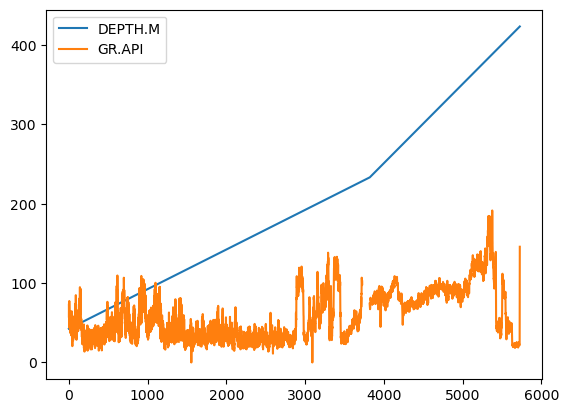

In [12]:
p2_gr = p2_kut[['DEPTH.M','GR.API']]
gr = pd.concat((p2_gr,p3_gr), axis=0, ignore_index=True)
gr.plot()


Concatenating KUT data from Phases 2 and 3 to plot:

<Axes: >

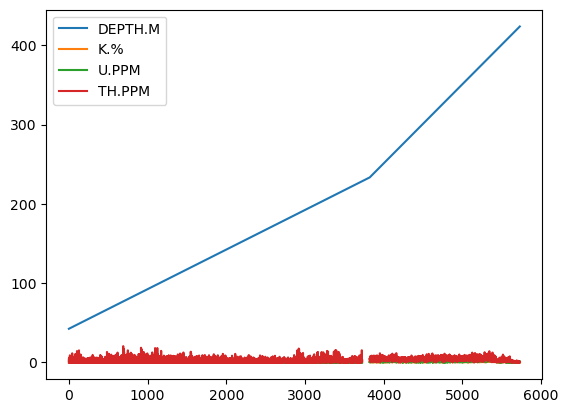

In [13]:
p2_kut = p2_kut[['DEPTH.M','K.%','U.PPM','TH.PPM']]
kut = pd.concat((p2_kut,p3_kut), axis=0, ignore_index=True)
kut.plot()

## VSP and SPR logs
Concatenating VSP data from Phases 2 and 3 to plot:

<Axes: >

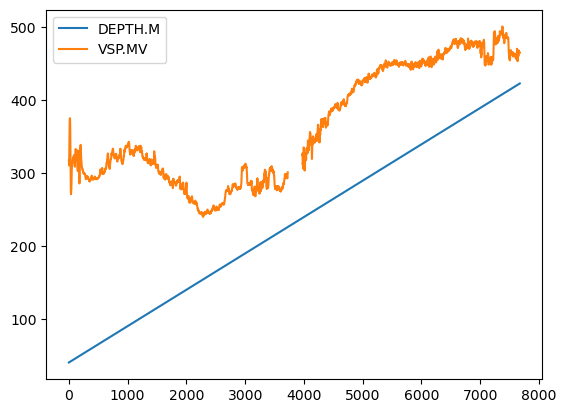

In [14]:
vsp = pd.concat((p2_vsp,p3_vsp), axis=0, ignore_index=True)
vsp.plot()

Concatenating SPR data from Phases 2 and 3 to plot:

<Axes: >

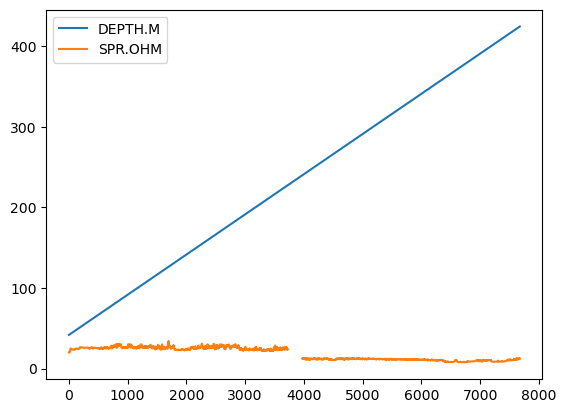

In [15]:
spr = pd.concat((p2_spr,p3_spr), axis=0, ignore_index=True)
spr.plot()

<Axes: >

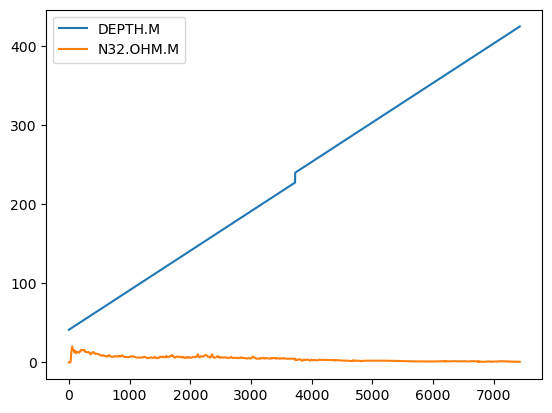

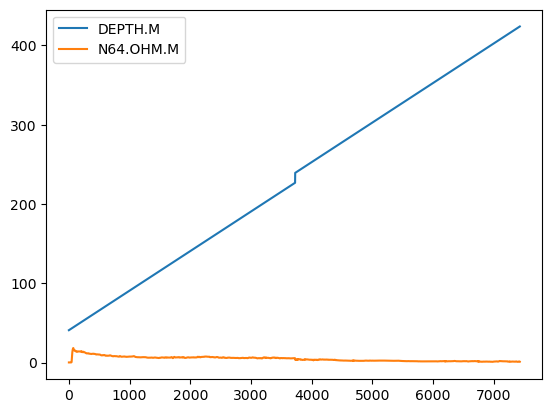

In [16]:
n8  = pd.concat((p2_n8,p3_n8), axis=0, ignore_index=True)
n16 = pd.concat((p2_n16,p3_n16), axis=0, ignore_index=True)
n32 = pd.concat((p2_n32,p3_n32), axis=0, ignore_index=True)
n64 = pd.concat((p2_n64,p3_n64), axis=0, ignore_index=True)
n32.plot()
n64.plot()


<Axes: >

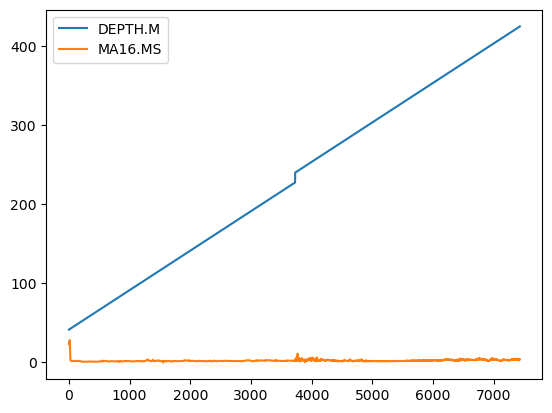

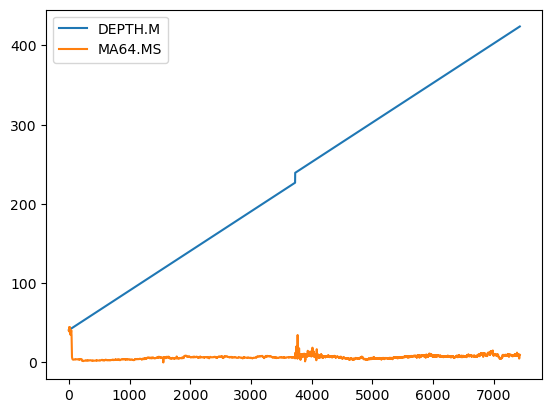

In [17]:
ma16 = pd.concat((p2_ma16,p3_ma16), axis=0, ignore_index=True)
ma64 = pd.concat((p2_ma64,p3_ma64), axis=0, ignore_index=True)
ma16.plot()
ma64.plot()

/tmp/ipykernel_4587/348869542.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1)


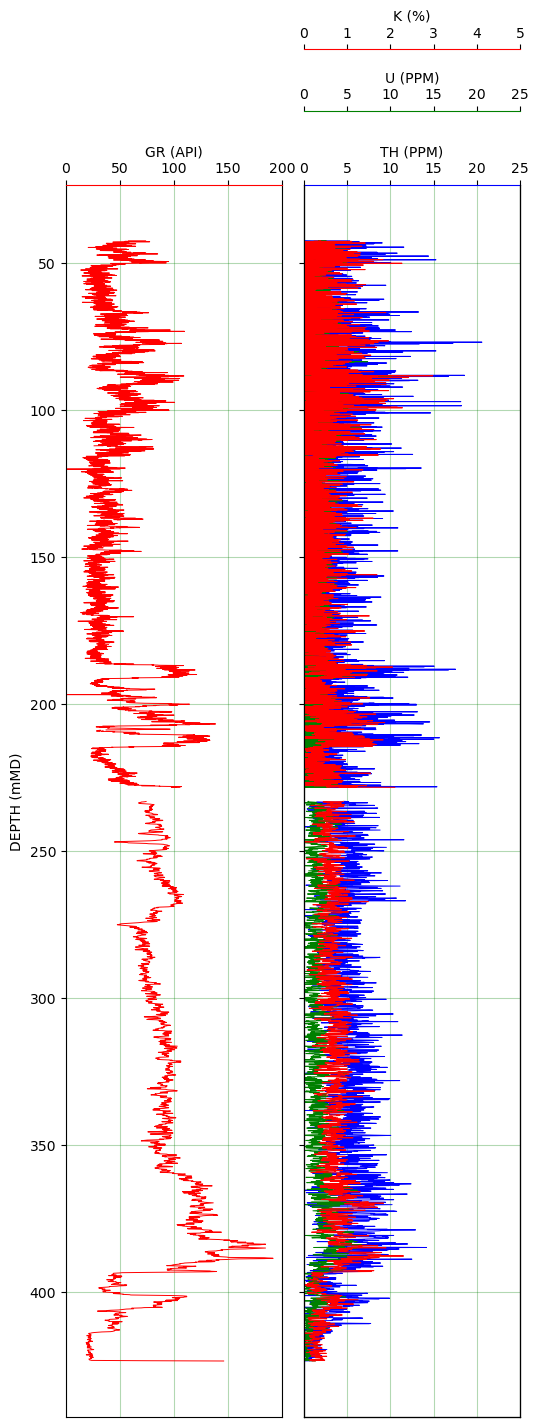

In [18]:
f9, ax1 = plt.subplots(figsize=(12,16))
#Reduce the space between each subplot
f9.subplots_adjust(wspace = 0.1)
ax1 = plt.gca()
ax1.invert_yaxis()

curve_names = ['GR (API)', 'TH (PPM)','U (PPM)','K (%)']

#Set up the plot axes
ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
ax3 = ax2.twiny()
ax4 = ax2.twiny()

#Set up the individual log tracks
ax1.plot(gr['GR.API'], gr['DEPTH.M'], color = "red", lw = 0.7)
ax1.set_xlim(0, 200)
ax1.spines['top'].set_edgecolor('red')
ax1.set_ylabel('DEPTH (mMD)')
ax1.invert_yaxis()

ax2.plot(kut['TH.PPM'], kut['DEPTH.M'], color = "blue", lw = 0.7)
ax2.set_xlim(0, 25)
ax2.spines['top'].set_edgecolor('blue')

ax3.plot(kut['U.PPM'], kut['DEPTH.M'], color = "green", lw = 0.7)
ax3.set_xlim(0, 25)
ax3.spines['top'].set_edgecolor('green')

ax4.plot(kut['K.%'], kut['DEPTH.M'], color = "red", lw = 0.7)
ax4.set_xlim(0, 5)
ax4.spines['top'].set_edgecolor('red')

#Set up the common elements between the subplots
for i, ax in enumerate(f9.axes):
    #ax.set_ylim(450,0) # Set the depth range
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.set_xlabel(curve_names[i])
    
    if i >= 2:
        ax.spines["top"].set_position(("axes", 0.96+(i/20)))
    else:
        ax.grid(True, c="g", alpha=0.3)

#Hide tick labels on the y-axis 
for ax in [ax2, ax3, ax4]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
axs = plt.gca()
axs.invert_yaxis()

/tmp/ipykernel_4587/3125627056.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)


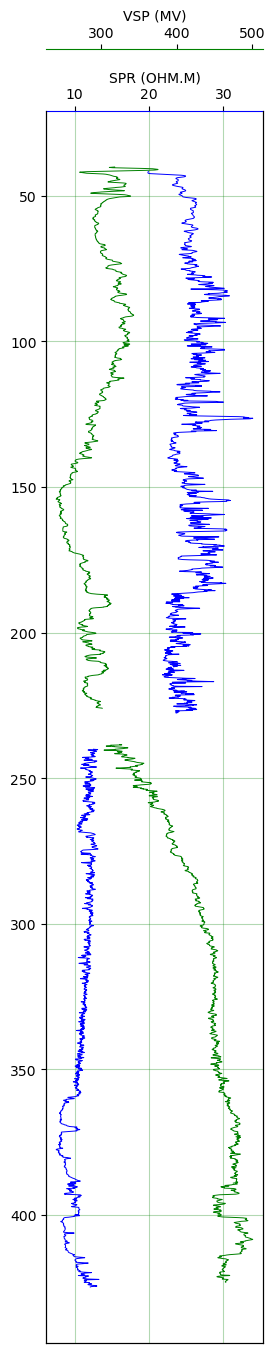

In [19]:
f8, ax1 = plt.subplots(figsize=(12,16))
#Reduce the space between each subplot
f8.subplots_adjust(wspace = 0.1)
ax1 = plt.gca()
ax1.invert_yaxis()

curve_names = ['SPR (OHM.M)','VSP (MV)']

#Set up the plot axes
#ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
ax3 = ax2.twiny()

#Set up the individual log tracks
#ax1.plot(gr['GR.API'], gr['DEPTH.M'], color = "red", lw = 0.7)
#ax1.set_xlim(0, 200)
#ax1.spines['top'].set_edgecolor('red')
#ax1.set_ylabel('DEPTH (mMD)')
#ax1.invert_yaxis()

ax2.plot(spr['SPR.OHM'], spr['DEPTH.M'], color = "blue", lw = 0.7)
#ax2.set_xlim(0, 25)
ax2.spines['top'].set_edgecolor('blue')

ax3.plot(vsp['VSP.MV'], vsp['DEPTH.M'], color = "green", lw = 0.7)
#ax3.set_xlim(0, 25)
ax3.spines['top'].set_edgecolor('green')


#Set up the common elements between the subplots
for i, ax in enumerate(f8.axes):
    #ax.set_ylim(450,0) # Set the depth range
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.set_xlabel(curve_names[i])
    
    if i >= 1:
        ax.spines["top"].set_position(("axes", 1.05))
    else:
        ax.grid(True, c="g", alpha=0.3)

#Hide tick labels on the y-axis 
for ax in [ ax3]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
axs = plt.gca()
axs.invert_yaxis()

/tmp/ipykernel_4587/840912922.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)


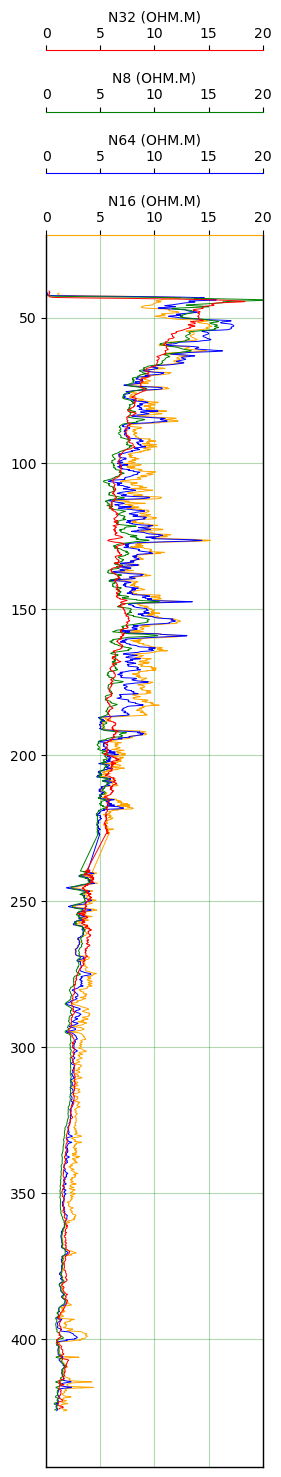

In [20]:
f7, ax1 = plt.subplots(figsize=(12,16))
#Reduce the space between each subplot
f7.subplots_adjust(wspace = 0.1)
ax1 = plt.gca()
ax1.invert_yaxis()

curve_names = ['N16 (OHM.M)', 'N64 (OHM.M)','N8 (OHM.M)', 'N32 (OHM.M)']

#Set up the plot axes
#ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
ax3 = ax2.twiny()
ax4 = ax2.twiny()
ax5 = ax2.twiny()

#Set up the individual log tracks
#ax1.plot(gr['GR.API'], gr['DEPTH.M'], color = "red", lw = 0.7)
#ax1.set_xlim(0, 200)
#ax1.spines['top'].set_edgecolor('red')
#ax1.set_ylabel('DEPTH (mMD)')
#ax1.invert_yaxis()

#N8
ax2.plot(n8['N8.OHM.M'], n8['DEPTH.M'], color = "orange", lw = 0.7)
ax2.set_xlim(0, 20)
ax2.spines['top'].set_edgecolor('orange')

#N16
ax3.plot(n16['N16.OHM.M'], n16['DEPTH.M'], color = "blue", lw = 0.7)
ax3.set_xlim(0, 20)
ax3.spines['top'].set_edgecolor('blue')

#N32
ax4.plot(n32['N32.OHM.M'], n32['DEPTH.M'], color = "green", lw = 0.7)
ax4.set_xlim(0, 20)
ax4.spines['top'].set_edgecolor('green')

#N64
ax5.plot(n64['N64.OHM.M'], n64['DEPTH.M'], color = "red", lw = 0.7)
ax5.set_xlim(0, 20)
ax5.spines['top'].set_edgecolor('red')

#Set up the common elements between the subplots
for i, ax in enumerate(f7.axes):
    #ax.set_ylim(450,0) # Set the depth range
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.set_xlabel(curve_names[i])
    
    if i >= 1:
        ax.spines["top"].set_position(("axes", 1+(i/20)))
    else:
        ax.grid(True, c="g", alpha=0.3)

#Hide tick labels on the y-axis 
for ax in [ax3, ax4, ax5]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
axs = plt.gca()
axs.invert_yaxis()

/tmp/ipykernel_4587/2474692343.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)


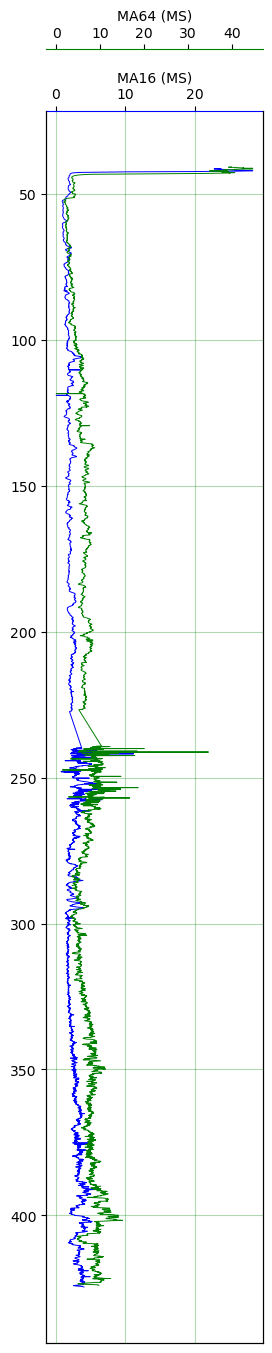

In [21]:
f7a, ax1 = plt.subplots(figsize=(12,16))
#Reduce the space between each subplot
f7a.subplots_adjust(wspace = 0.1)
ax1 = plt.gca()
ax1.invert_yaxis()

curve_names = ['MA16 (MS)','MA64 (MS)']

#Set up the plot axes
#ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
ax3 = ax2.twiny()

#Set up the individual log tracks
#ax1.plot(gr['GR.API'], gr['DEPTH.M'], color = "red", lw = 0.7)
#ax1.set_xlim(0, 200)
#ax1.spines['top'].set_edgecolor('red')
#ax1.set_ylabel('DEPTH (mMD)')
#ax1.invert_yaxis()

ax2.plot(ma16['MA16.MS'], ma16['DEPTH.M'], color = "blue", lw = 0.7)
#ax2.set_xlim(0, 25)
ax2.spines['top'].set_edgecolor('blue')

ax3.plot(ma64['MA64.MS'], ma64['DEPTH.M'], color = "green", lw = 0.7)
#ax3.set_xlim(0, 25)
ax3.spines['top'].set_edgecolor('green')


#Set up the common elements between the subplots
for i, ax in enumerate(f7a.axes):
    #ax.set_ylim(450,0) # Set the depth range
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.set_xlabel(curve_names[i])
    
    if i >= 1:
        ax.spines["top"].set_position(("axes", 1.05))
    else:
        ax.grid(True, c="g", alpha=0.3)

#Hide tick labels on the y-axis 
for ax in [ ax3]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
axs = plt.gca()
axs.invert_yaxis()

## VP and VS


In [22]:
from sys import stdout
# Load LAS files from phase 3 (.las version 2)
p3_vpvs = lasio.read(os.path.join('../data/raw/DAPGEO-02_500m_PHASE3_VPVS_processed.las'))
p3_vpvs.to_excel('phase3_VPVS.xlsx')

# Load LAS files from phase 4  (.las version 2)
p4_vs = lasio.read(os.path.join('../data/raw/DAPGEO-02_500m_PHASE4_VS_processed.las'))
p4_vs.to_excel('phase4_VS.xlsx')

In [23]:
print(p3_vpvs.curves)

Mnemonic        Unit  Value  Description     
--------        ----  -----  -----------     
DEPT            M            DEPTH           
V_P-WAVE_SONIC  M/S          V P-wave Sonic  
V_P-WAVE_PS     M/S          V P-wave PS     
V_S-WAVE_PS_1   M/S          V S-wave PS_1   
V_S-WAVE_PS_2   M/S          V S-wave PS_2   


/tmp/ipykernel_4587/1792012860.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)


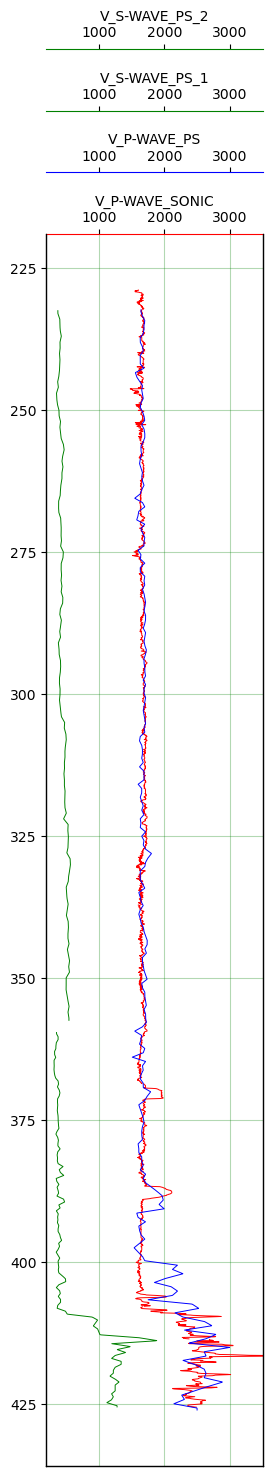

In [24]:
f6, ax1 = plt.subplots(figsize=(12,16))
#Reduce the space between each subplot
f6.subplots_adjust(wspace = 0.1)
ax1 = plt.gca()
ax1.invert_yaxis()

curve_names = ['V_P-WAVE_SONIC', 'V_P-WAVE_PS','V_S-WAVE_PS_1', 'V_S-WAVE_PS_2']

#Set up the plot axes
#ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
ax3 = ax2.twiny()
ax4 = ax2.twiny()
ax5 = ax2.twiny()

#Set up the individual log tracks
#ax1.plot(gr['GR.API'], gr['DEPTH.M'], color = "red", lw = 0.7)
#ax1.set_xlim(0, 200)
#ax1.spines['top'].set_edgecolor('red')
#ax1.set_ylabel('DEPTH (mMD)')
#ax1.invert_yaxis()

#V_P-WAVE_SONIC
ax2.plot(p3_vpvs['V_P-WAVE_SONIC'], p3_vpvs['DEPT'], color = "red", lw = 0.7)
ax2.set_xlim(200, 3500)
ax2.spines['top'].set_edgecolor('red')

#V_P-WAVE_PS
ax3.plot(p3_vpvs['V_P-WAVE_PS'], p3_vpvs['DEPT'], color = "blue", lw = 0.7)
ax3.set_xlim(200, 3500)
ax3.spines['top'].set_edgecolor('blue')

#V_S-WAVE_PS_1
ax4.plot(p3_vpvs['V_S-WAVE_PS_1'], p3_vpvs['DEPT'], color = "green", lw = 0.7)
ax4.set_xlim(200, 3500)
ax4.spines['top'].set_edgecolor('green')

#V_S-WAVE_PS_2
ax5.plot(p3_vpvs['V_S-WAVE_PS_2'], p3_vpvs['DEPT'], color = "green", lw = 0.7)
ax5.set_xlim(200, 3500)
ax5.spines['top'].set_edgecolor('green')

#Set up the common elements between the subplots
for i, ax in enumerate(f6.axes):
    #ax.set_ylim(450,0) # Set the depth range
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.set_xlabel(curve_names[i])
    
    if i >= 1:
        ax.spines["top"].set_position(("axes", 1+(i/20)))
    else:
        ax.grid(True, c="g", alpha=0.3)

#Hide tick labels on the y-axis 
for ax in [ax3, ax4, ax5]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
axs = plt.gca()
axs.invert_yaxis()

## Phase 4

In [25]:
p4_kut = lasio.read(os.path.join('../data/raw/DAPGEO-02_500m_PHASE4_SGR.las'))
#p4_abi = lasio.read(os.path.join('../data/raw/DAPGEO-02_500m_PHASE4_ABI.las'))
p4_il = lasio.read(os.path.join('../data/raw/DAPGEO-02_500m_PHASE4_IL.las'))


In [26]:
p4_kut.keys() 

['DEPT',
 'TIME_ENC',
 'SPEED_ENC',
 'TENSION_TEN',
 'ETIME_SGR',
 'K_SGR',
 'U_SGR',
 'TH_SGR',
 'KTH_SGR',
 'GAMMA_SGR',
 'GRS_SGR']

In [27]:
print(p4_kut.curves) 

Mnemonic     Unit   Value  Description  
--------     ----   -----  -----------  
DEPT         M             DEPTH        
TIME_ENC     S             Time.ENC     
SPEED_ENC    M/MIN         Speed.ENC    
TENSION_TEN  N             Tension.TEN  
ETIME_SGR    S             ETime.SGR    
K_SGR        %             K.SGR        
U_SGR        PPM           U.SGR        
TH_SGR       PPM           Th.SGR       
KTH_SGR      API           KTH.SGR      
GAMMA_SGR    GAPI          Gamma.SGR    
GRS_SGR      GAPI          GRS.SGR      


/tmp/ipykernel_4587/2266430396.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1)


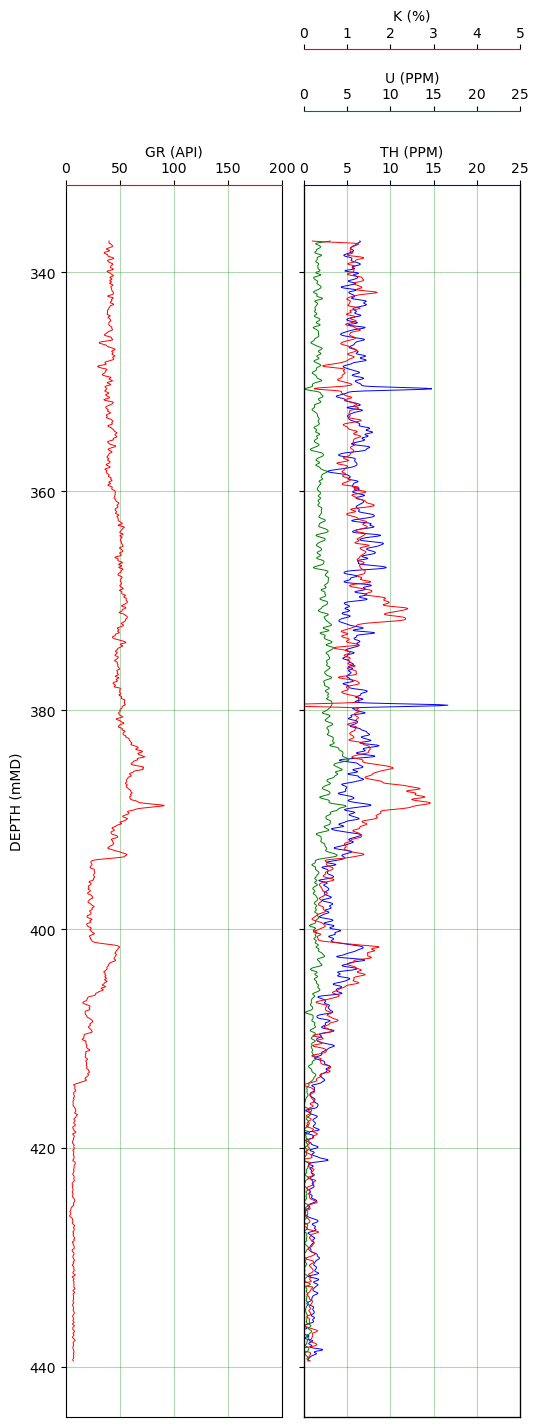

In [28]:
f5, ax1 = plt.subplots(figsize=(12,16))
#Reduce the space between each subplot
f5.subplots_adjust(wspace = 0.1)
ax1 = plt.gca()
ax1.invert_yaxis()

curve_names = ['GR (API)', 'TH (PPM)','U (PPM)','K (%)']

#Set up the plot axes
ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
ax3 = ax2.twiny()
ax4 = ax2.twiny()

#Set up the individual log tracks
ax1.plot(p4_kut['GAMMA_SGR'], p4_kut['DEPT'], color = "red", lw = 0.7)
ax1.set_xlim(0, 200)
ax1.spines['top'].set_edgecolor('red')
ax1.set_ylabel('DEPTH (mMD)')
ax1.invert_yaxis()

ax2.plot(p4_kut['TH_SGR'], p4_kut['DEPT'], color = "blue", lw = 0.7)
ax2.set_xlim(0, 25)
ax2.spines['top'].set_edgecolor('blue')

ax3.plot(p4_kut['U_SGR'], p4_kut['DEPT'], color = "green", lw = 0.7)
ax3.set_xlim(0, 25)
ax3.spines['top'].set_edgecolor('green')

ax4.plot(p4_kut['K_SGR'], p4_kut['DEPT'], color = "red", lw = 0.7)
ax4.set_xlim(0, 5)
ax4.spines['top'].set_edgecolor('red')

#Set up the common elements between the subplots
for i, ax in enumerate(f5.axes):
    #ax.set_ylim(450,0) # Set the depth range
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.set_xlabel(curve_names[i])
    
    if i >= 2:
        ax.spines["top"].set_position(("axes", 0.96+(i/20)))
    else:
        ax.grid(True, c="g", alpha=0.3)

#Hide tick labels on the y-axis 
for ax in [ax2, ax3, ax4]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
axs = plt.gca()
axs.invert_yaxis()

In [29]:
print(p4_il.curves)

Mnemonic   Unit     Value  Description  
--------   ----     -----  -----------  
DEPT       M               DEPTH        
GAMMA      API-GR          GAMMA        
COND       MMHO/M          COND         
RES        OHM-M           RES          
TEMP       DEG-C           TEMP         
AP-COND    MMHO/M          AP-COND      
TEMP#1     CPS             TEMP#1       
AP-COND#1  CPS             AP-COND#1    
TENSION    CPS             TENSION      
TIME       SECONDS         TIME         


In [30]:
p4_il

/tmp/ipykernel_4587/2068200148.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)


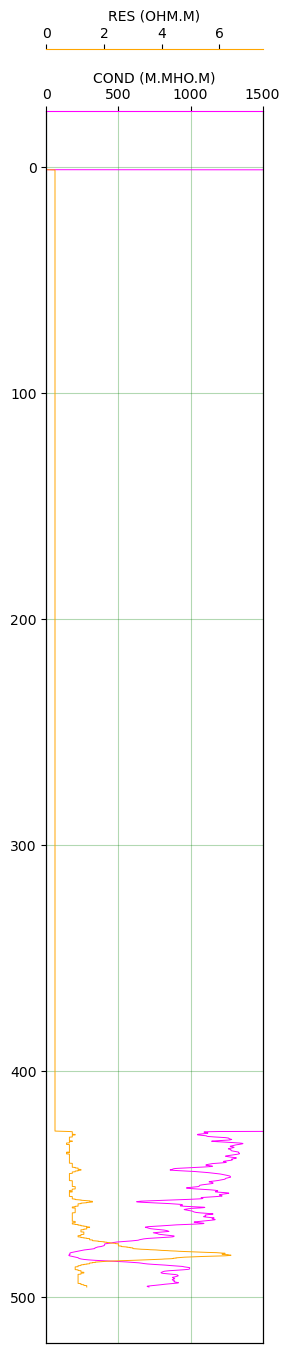

In [34]:
f4, ax1 = plt.subplots(figsize=(12,16))
#Reduce the space between each subplot
f4.subplots_adjust(wspace = 0.1)
ax1 = plt.gca()
ax1.invert_yaxis()

curve_names = ['COND (M.MHO.M)','RES (OHM.M)']

#Set up the plot axes
#ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
ax3 = ax2.twiny()

#Set up the individual log tracks
#ax1.plot(gr['GR.API'], gr['DEPTH.M'], color = "red", lw = 0.7)
#ax1.set_xlim(0, 200)
#ax1.spines['top'].set_edgecolor('red')
#ax1.set_ylabel('DEPTH (mMD)')
#ax1.invert_yaxis()

ax2.plot(p4_il['COND'], p4_il['DEPT'], color = "magenta", lw = 0.7)
ax2.set_xlim(0, 1500)
ax2.spines['top'].set_edgecolor('magenta')

ax3.plot(p4_il['RES'], p4_il['DEPT'], color = "orange", lw = 0.7)
ax3.set_xlim(0, 7.5)
ax3.spines['top'].set_edgecolor('orange')


#Set up the common elements between the subplots
for i, ax in enumerate(f4.axes):
    #ax.set_ylim(450,0) # Set the depth range
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.set_xlabel(curve_names[i])
    
    if i >= 1:
        ax.spines["top"].set_position(("axes", 1.05))
    else:
        ax.grid(True, c="g", alpha=0.3)

#Hide tick labels on the y-axis 
for ax in [ ax3]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
axs = plt.gca()
axs.invert_yaxis()

In [ ]:
las = lasio.read('Data/P11-A-02_Composite_MEM_Image_NF.las')

de =las.df()
df.describe()

azidendf = df[['ABDC1M', 'ABDC2M', 'ABDC3M', 'ABDC4M', 'ABDC5M', 'ABDC6M', 'ABDC7M', 'ABDC8M', 'ABDC9M',
       'ABDC10M', 'ABDC11M', 'ABDC12M', 'ABDC13M', 'ABDC14M', 'ABDC15M',
       'ABDC16M']]

plt.figure(figsize=(7,15))
miny = azidendf.index.min()
maxy = azidendf.index.max()
plt.imshow(azidendf, interpolation='bilinear',
           aspect='auto', cmap=plt.cm.YlOrRd,
           vmin=1.5, vmax=2.6,
          extent=[0, 360, maxy, miny])

plt.ylim(2130, 2100)

plt.colorbar(orientation='horizontal', pad =0.04)
plt.show()

####  Building the final plot

fig, ax = plt.subplots(figsize=(10, 15))

ax1 = plt.subplot2grid((1,3),(0,0))
ax2 = plt.subplot2grid((1,3),(0,1))
ax3 = plt.subplot2grid((1,3),(0,2))
ax4 = plt.twiny(ax3)

ax1.imshow(azigamdf, interpolation='bilinear',
           aspect='auto', cmap=plt.cm.YlOrRd,
           vmin=0, vmax=150,
          extent=[0, 360, maxy, miny])

ax2.imshow(azidendf, interpolation='bilinear',
           aspect='auto', cmap=plt.cm.YlOrRd,
           vmin=1.5, vmax=2.6,
          extent=[0, 360, maxy, miny])


ax3.plot('DEVI', 'DEPTH', data=survey, color='blue')
ax3.set_xlim(0,90)
ax3.spines["top"].set_position(("axes", 1.06))
ax3.tick_params(axis='x', colors="blue")
ax3.spines["top"].set_edgecolor("blue")
ax3.set_xlabel('Deviation')
ax3.xaxis.label.set_color("blue")

ax4.plot('AZIM', 'DEPTH', data=survey, color='red')
ax4.set_xlim(0,360)
ax4.tick_params(axis='x', colors="red")
ax4.spines["top"].set_edgecolor("red")
ax4.set_xlabel('Azimuth')
ax4.xaxis.label.set_color("red")

for ax in [ax1, ax2, ax3]:
    ax.set_ylim(2600, 2000)
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    
plt.show()